In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras import datasets, layers, models
import tensorflow as tf

import numpy as np
import os
import utils

from sklearn import preprocessing
from keras.losses import losses_utils

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from imblearn.over_sampling import SMOTE

2023-06-22 18:19:16.266868: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 18:19:17.103490: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-06-22 18:19:18.722722: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-22 18:19:18.821299: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-22 18:19:18.821633: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
tf.config.run_functions_eagerly(True)
os.environ["TF_KERAS"]='1'
tf.data.experimental.enable_debug_mode()

In [4]:
train_df=pd.read_csv('/media/yash/Data/kaggle_data/fake or real image/Dataset/train.csv')
test_df=pd.read_csv('/media/yash/Data/kaggle_data/fake or real image/Dataset/test.csv')

In [5]:
train_df.head(10)

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,1,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,0,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169
5,0,-0.526642,-0.590432,0.328210,-0.547433,-0.692556,0.175954,0.539330,0.578212,0.547327,...,1.131889,0.250693,-0.215257,0.236730,0.905414,-0.102015,-2.453250,-1.562715,-0.324501,1.590111
6,0,-0.199279,0.831787,-1.052687,0.491722,-0.571469,-1.449519,-0.227167,0.451431,0.090848,...,1.081787,0.875338,-1.217201,-0.297249,-0.133911,-0.865070,-0.128914,1.153154,0.363864,0.670339
7,0,-0.906233,0.987997,-2.056229,1.078932,0.501608,0.826041,-0.136533,-0.931548,-0.657145,...,1.041859,-0.313667,1.492701,-0.425727,-0.425587,-0.408214,2.041689,0.814182,0.211569,0.343013
8,0,-0.283658,0.964051,-0.349123,-0.162445,0.238172,0.501472,0.413006,-1.183602,-0.221886,...,-1.612677,-0.714356,-0.033445,-2.350722,-1.373337,-1.521727,0.015327,0.114279,1.320421,0.979955
9,0,1.382773,-2.415394,0.969006,-1.690371,1.509442,0.914959,-0.161389,0.952598,-0.044989,...,0.875176,-0.855081,0.318588,0.252447,0.400645,1.732217,-0.390191,0.628386,-1.518295,-0.218986


In [6]:
max=train_df.max()
max

labels    1.000000
f_0       3.439295
f_1       3.581171
f_2       3.991985
f_3       3.900672
            ...   
f_1195    3.269490
f_1196    3.526907
f_1197    3.542401
f_1198    3.642856
f_1199    3.718869
Length: 1201, dtype: float64

In [7]:
value_counts = train_df['labels'].value_counts()
column_values = train_df['labels'].unique()

In [8]:
value_counts.values

array([3850, 1400])

In [9]:
train_df.shape

(5250, 1201)

In [10]:
#preprocessing begins
Train_image=train_df.drop('labels',axis ='columns')
Train_label=train_df['labels']    

In [11]:
Train_label.head()

0    0
1    1
2    1
3    0
4    0
Name: labels, dtype: int64

In [12]:
smote = SMOTE(sampling_strategy='minority')
Train_image_sm, Train_label_sm=smote.fit_resample(Train_image,Train_label)

In [13]:
Train_image=Train_image_sm.to_numpy()
Train_label=Train_label_sm.to_numpy()
Train_reshape_image=Train_image.reshape(-1,20,20,3)

In [14]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(Train_reshape_image,Train_label,test_size=0.3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


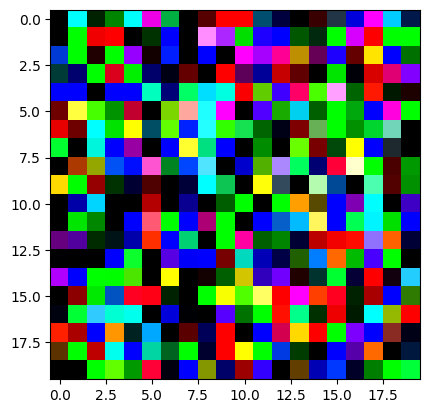

In [15]:
plt.imshow(Xtrain[1])

In [16]:
def model_cnn_func(Xtrain,Xtest,Ytrain,Ytest,acc_mod_no):
    
    
    model_cnn = models.Sequential([
            layers.Conv2D(filters=16,kernel_size=(11,11),activation='relu',input_shape=(20,20,3),strides=(2,2),use_bias=True),
            layers.Dropout(0.2),
            layers.MaxPool2D((2,2),padding='same'),
            layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',use_bias=True),
            layers.MaxPool2D((2,2),padding ='same'), 
    
            layers.Flatten(),
            layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.L1(l=0.01)),
            layers.Dropout(0.4),
            layers.Dense(32,activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(16,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l=0.001)),
            layers.Dropout(0.5),
            layers.Dense(2,activation='softmax')
            ])

    opt =tf.keras.optimizers.Adam(learning_rate=0.0006)

    model_cnn.compile(optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy',]
        )
    model_cnn.fit(Xtrain,Ytrain,epochs=7,verbose=0) 
    accuracy_mod=model_cnn.evaluate(Xtest,Ytest)
    
    if(acc_mod_no==5):
        joblib.dump(model_cnn,"train_model.joblib")
    
    
    print(accuracy_mod)
    
    print("")
        
    return(accuracy_mod)

In [17]:


model_cnn = models.Sequential([
        
        layers.Conv2D(filters=16,kernel_size=(11,11),activation='relu',input_shape=(20,20,3),strides=(2,2),use_bias=True),
        layers.Dropout(0.2),
        layers.MaxPool2D((2,2),padding='same'),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',use_bias=True),
        layers.MaxPool2D((2,2),padding ='same'), 
    
        layers.Flatten(),
        layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.L1(l=0.01)),
        layers.Dropout(0.4),
        layers.Dense(32,activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l=0.001)),
        layers.Dropout(0.5),
        layers.Dense(2,activation='softmax')
        ])

opt =tf.keras.optimizers.Adam(learning_rate=0.0006)

model_cnn.compile(optimizer=opt,
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy',]
    )
model_cnn.fit(Xtrain,Ytrain,epochs=7,verbose=0)
accuracy_mod=model_cnn.evaluate(Xtest,Ytest)

2023-06-22 18:19:21.639193: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-22 18:19:21.639627: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-22 18:19:21.639892: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

73/73 [==============================] - 1s 16ms/step - loss: 0.3660 - accuracy: 0.8779


model_cnn.fit(Xtrain,Ytrain,epochs=7)
accuracy_mod=model_cnn.evaluate(Xtest,Ytest)

In [18]:
from sklearn.model_selection import StratifiedKFold
fold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=3)

In [19]:
acc_mod=1

for train_index,test_index in kfold.split(Train_reshape_image,Train_label):
    X_train,X_test,Y_train,Y_test=Train_reshape_image[train_index],Train_reshape_image[test_index], \
    Train_label[train_index],Train_label[test_index]
    model_cnn_func(X_train,X_test,Y_train,Y_test,acc_mod)
    acc_mod=acc_mod+1
    
acc_mod=0
    
for train_index,test_index in fold.split(Train_reshape_image,Train_label):
    X_train,X_test,Y_train,Y_test=Train_reshape_image[train_index],Train_reshape_image[test_index], \
    Train_label[train_index],Train_label[test_index]
    model_cnn_func(X_train,X_test,Y_train,Y_test,acc_mod)
    acc_mod=acc_mod+1
    

49/49 [==============================] - 1s 16ms/step - loss: 0.3262 - accuracy: 0.8883
[0.32622548937797546, 0.8883116841316223]

49/49 [==============================] - 4s 83ms/step - loss: 0.2999 - accuracy: 0.8981
[0.29987800121307373, 0.8980519771575928]

49/49 [==============================] - 1s 15ms/step - loss: 0.3123 - accuracy: 0.8948
[0.312296986579895, 0.8948051929473877]

49/49 [==============================] - 1s 15ms/step - loss: 0.3332 - accuracy: 0.8669
[0.3332161605358124, 0.8668830990791321]

49/49 [==============================] - 1s 16ms/step - loss: 0.3140 - accuracy: 0.8955
[0.3139589726924896, 0.8954545259475708]

49/49 [==============================] - 1s 15ms/step - loss: 0.9890 - accuracy: 0.6935
[0.9890155792236328, 0.6935064792633057]

49/49 [==============================] - 1s 15ms/step - loss: 0.5063 - accuracy: 0.8156
[0.5063248872756958, 0.8155844211578369]

49/49 [==============================] - 1s 15ms/step - loss: 0.2426 - accuracy: 0.9312
[

In [20]:
model_saved=joblib.load("train_model.joblib")
Xtrain,Xtest,Ytrain,Ytest=train_test_split(Train_reshape_image,Train_label,test_size=0.3)
model_saved.evaluate(Xtest,Ytest)

73/73 [==============================] - 1s 14ms/step - loss: 0.1594 - accuracy: 0.9667


[0.15937946736812592, 0.9666666388511658]

In [21]:
yp=model_cnn.predict(Xtest)
yp[:5]

73/73 [==============================] - 1s 8ms/step


array([[9.9999475e-01, 5.1966658e-06],
       [9.9909413e-01, 9.0590521e-04],
       [1.5272242e-01, 8.4727758e-01],
       [9.6964091e-01, 3.0359091e-02],
       [7.2505763e-03, 9.9274945e-01]], dtype=float32)

In [22]:
yp=yp.flatten()
yp.shape

(4620,)

In [23]:
y_pred=[]
i=0

while(i!=4620):
    if yp[i] >yp[i+1]:
        y_pred.append(0)
    else:
        y_pred.append(1)
    i=i+2

In [24]:
y_pred[:15]

[0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]

In [25]:
Ytest[:15]

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [26]:
from sklearn.metrics import f1_score
f1_score=(Ytest,yp)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Ytest,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1159
           1       0.94      0.96      0.95      1151

    accuracy                           0.95      2310
   macro avg       0.95      0.95      0.95      2310
weighted avg       0.95      0.95      0.95      2310



Text(95.72222222222221, 0.5, 'Truth')

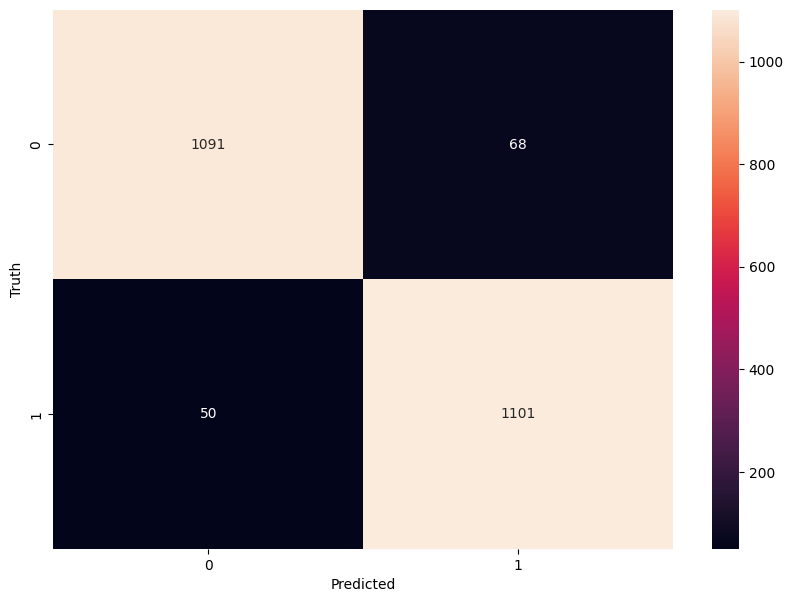

In [28]:
import seaborn as sn
cm =tf.math.confusion_matrix(labels=Ytest,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
test_df_d=test_df.drop('id',axis='columns')
test_df_d

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,-0.114245,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,-0.000680,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,-0.086128,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,0.570237,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,0.054435,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,0.204808,...,0.889888,-2.226556,-0.090717,-1.393713,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169
2246,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,1.107152,...,1.163494,-1.270468,-0.932417,-1.169053,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928
2247,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,0.767154,...,0.581740,-1.386512,0.809943,-1.243885,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976
2248,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,0.982839,...,1.078495,-1.193343,0.086061,-0.081338,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686


In [30]:
test_df

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,1,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,2,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,3,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,4,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,5,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,2246,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,...,0.889888,-2.226556,-0.090717,-1.393713,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169
2246,2247,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,...,1.163494,-1.270468,-0.932417,-1.169053,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928
2247,2248,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,...,0.581740,-1.386512,0.809943,-1.243885,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976
2248,2249,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,...,1.078495,-1.193343,0.086061,-0.081338,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686


In [31]:
test_df_d=test_df_d.to_numpy()
test_df_reshaped=test_df_d.reshape(-1,20,20,3)

In [32]:
model_cnn_loaded=joblib.load('train_model.joblib')

In [33]:
submission_pred=model_cnn_loaded.predict(test_df_reshaped)

71/71 [==============================] - 1s 9ms/step


In [34]:
sub=np.argmax(submission_pred,axis=1)
sub

array([0, 0, 1, ..., 1, 0, 1])

In [35]:
submission_data=pd.DataFrame({'id':test_df['id'],'Prediciton':sub})

In [36]:
submission_data.to_csv('/home/yash/Data/kaggle_data/submission/ai_image/submission1.csv',index=False)

In [37]:
read_sub=pd.read_csv('/home/yash/Data/kaggle_data/submission/ai_image/submission1.csv')
read_sub

,id,Prediciton
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0


test_df_d=test_df.drop('id',axis='columns')
test_df_d
test_df_d=test_df_d.to_numpy()
test_df_reshaped=test_df_d.reshape(-1,20,20,3)
submission_pred=model_saved.predict(test_df_reshaped)
sub=np.argmax(submission_pred,axis=1)
sub
submission_data=pd.DataFrame({'id':test_df['id'],'Prediciton':sub})
submission_data.to_csv('/home/yash/Data/kaggle_data/submission/ai_image/submission1.csv',index=False)
read_sub=pd.read_csv('/home/yash/Data/kaggle_data/submission/ai_image/submission1.csv')
read_sub